# Classification model to predict diabetes

### About the dataset:

The dataset is from the Kaggle website (https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset) and contains the patient diagnostic data. The classification goal is to predict if the patient has diabetes.

It includes over 100,000 records and 9 attributes.


### Objective: To build a classification model that predicts incidence of diabetes for a given patient. (note the target column to predict is 'diabetes') 

### We are going to perform the following steps: 

1. Import Libraries
2. Read in Dataset
3. Data Inspect and Cleaning
4. Exploratory Data Analysis
5. Feature Splitting and Scaling
6. Predictive Modeling (Logistic Regression)


# Importing Libraries

In [32]:
#!python3 -m pip install mlxtend

# Data Loading and Numerical Operations
import pandas as pd
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Read in Dataset

In [33]:
data = pd.read_csv("Diabetes_Prediction.csv") # Reading and converting the data into a pandas dataframe
data.shape # Calculating the dimensions of the dataset

(100000, 9)

In [34]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Above is an overview of the columns/features. 

Including feature non-null count and the data types.

Note that there are two categorical features, 'smoking_history' and 'gender'.

### Attributes:

* **gender**: "Female", "Male", "Other" (Categorical)
* **age**: patient's age (Continuous)
* **hypertension**: 0: non-hypertensive, 1: hypertensive (Binary)
* **heart_disease**: 0: no heart disease, 1: has heart disease (Binary)
* **smoking_history**:  (Categorical)
* **bmi**: patient's Body Mass Index (Continuous)
* **HbA1c_level**: patient's HbA1c (Continuous)
* **blood_glucose_level**: patient's blood glucose (Continuous)
* **diabetes**: (binary: “1” means “Yes”, “0” means “No”) - Target Variable


# Data Inspecting and Cleaning 

In [36]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Above confirms that there are no missing values, null values or np.nan present in the dataset.

In [37]:
data.duplicated().sum()

np.int64(3854)

Above shows that there are duplicated values present in the dataset.

In [38]:
data.drop_duplicates(inplace=True)

Now duplicates are removed from the dataset.

In [39]:
#data['smoking_history'].unique() 
#['never', 'No Info', 'current', 'former', 'ever', 'not current']
data['smoking_history'].replace({'No Info': 0, 'never': 1, 'ever': 2, 'former': 3, 'not current': 4, 'current': 5}, inplace=True)
data['smoking_history'].unique() 
data['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2}, inplace=True)

/var/folders/9n/1nl68bn16mqd0pkljvxf51qr0000gn/T/ipykernel_99478/1325434626.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['smoking_history'].replace({'No Info': 0, 'never': 1, 'ever': 2, 'former': 3, 'not current': 4, 'current': 5}, inplace=True)
/var/folders/9n/1nl68bn16mqd0pkljvxf51qr0000gn/T/ipykernel_99478/1325434626.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-i

Above the categorical features ('gender' and 'country') are replaced with numerical values.

Additionally the 'customer_id' column is removed.

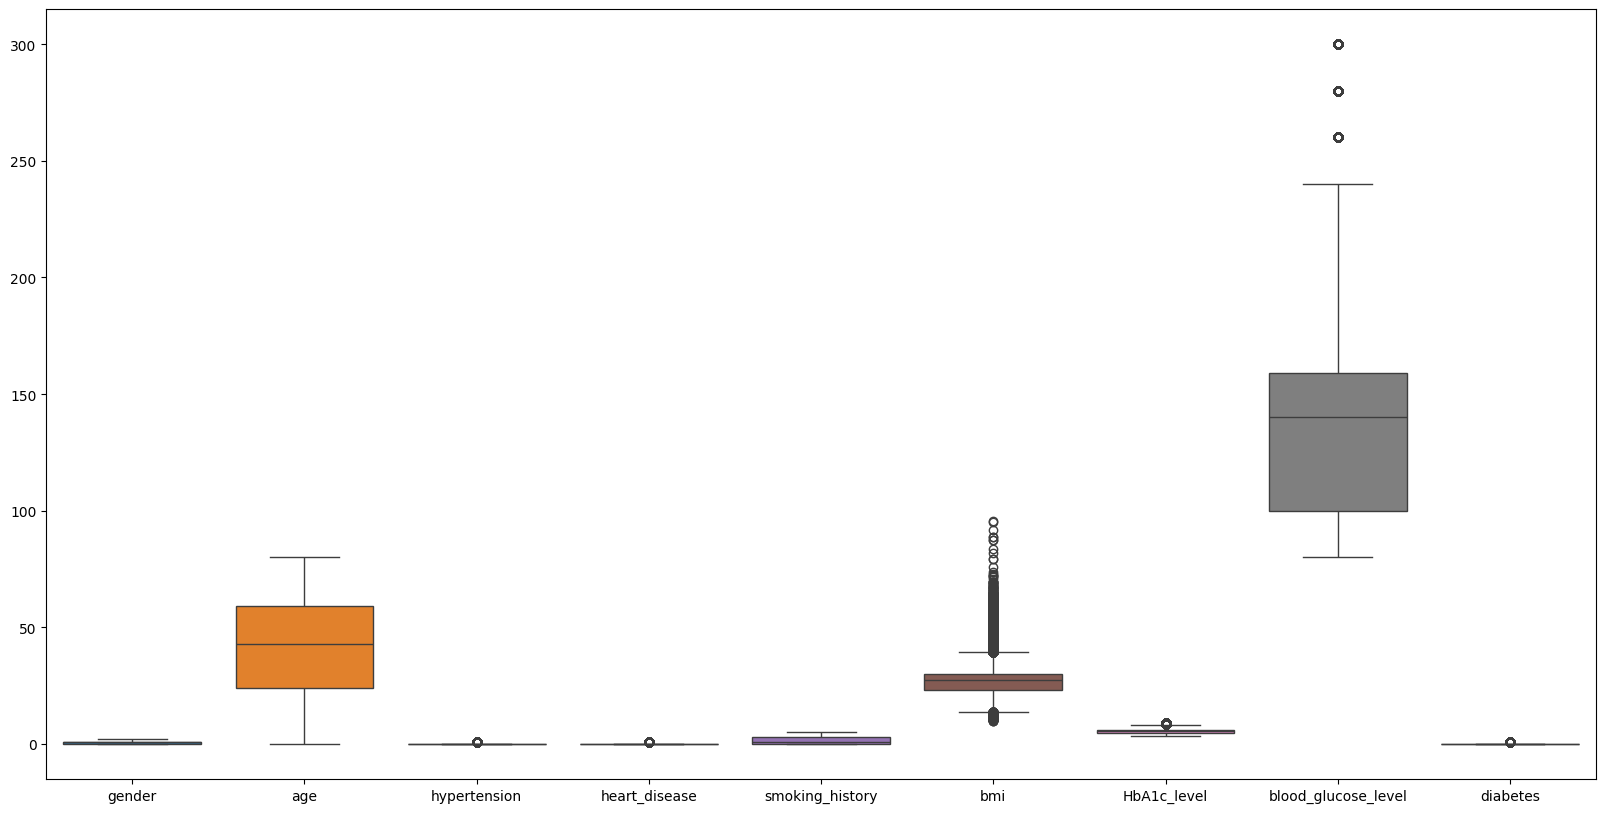

In [40]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

No (obvious) removable outliers are detected in the dataset.

With missing values, outliers and duplicate values out of the way,
the dataset is now ready for EDA.

# Exploratory Data Analysis

In [41]:
data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.584496,41.794326,0.077601,0.040803,1.474258,27.321461,5.532609,138.218231,0.088220
std,0.493191,22.462948,0.267544,0.197833,1.634661,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,3.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


Above, the overall statistical information is displayed
* mean, standard deviation and other statistical metrics
* the categorical data (converted into discrete numerical values)

# Feature Splitting and Scaling

In [42]:
y = data['diabetes']
X = data.drop(['diabetes'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

We divide the dataset into training and test sub-datasets for predictive modeling

In [43]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Predictive Modeling

Logistic Regression

In [44]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confusion matrix
[[34682   323]
 [ 1309  2145]]


Accuracy of Logistic Regression: 95.75651993031539 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     35005
           1       0.87      0.62      0.72      3454

    accuracy                           0.96     38459
   macro avg       0.92      0.81      0.85     38459
weighted avg       0.96      0.96      0.95     38459

